In [1]:
from IPython.display import display, HTML
display(HTML("<style>.output_scroll { height: auto !important; }</style>"))


# 1️⃣ Import libraries & load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv(r"C:\Users\b6nda\Downloads\bank+marketing\bank\bank-full.csv")


# 2️⃣ First look

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# 3️⃣ Target variable distribution

In [5]:
df['y'].value_counts()
df['y'].value_counts(normalize=True) * 100


y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

# 4️⃣ Missing values check

In [6]:
(df == 'unknown').sum().sort_values(ascending=False)

poutcome     36959
contact      13020
education     1857
job            288
month            0
previous         0
pdays            0
campaign         0
duration         0
age              0
day              0
loan             0
housing          0
balance          0
default          0
marital          0
y                0
dtype: int64

# 5️⃣ Numerical features summary

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df[['age','balance','duration','campaign','pdays','previous']].skew()


age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

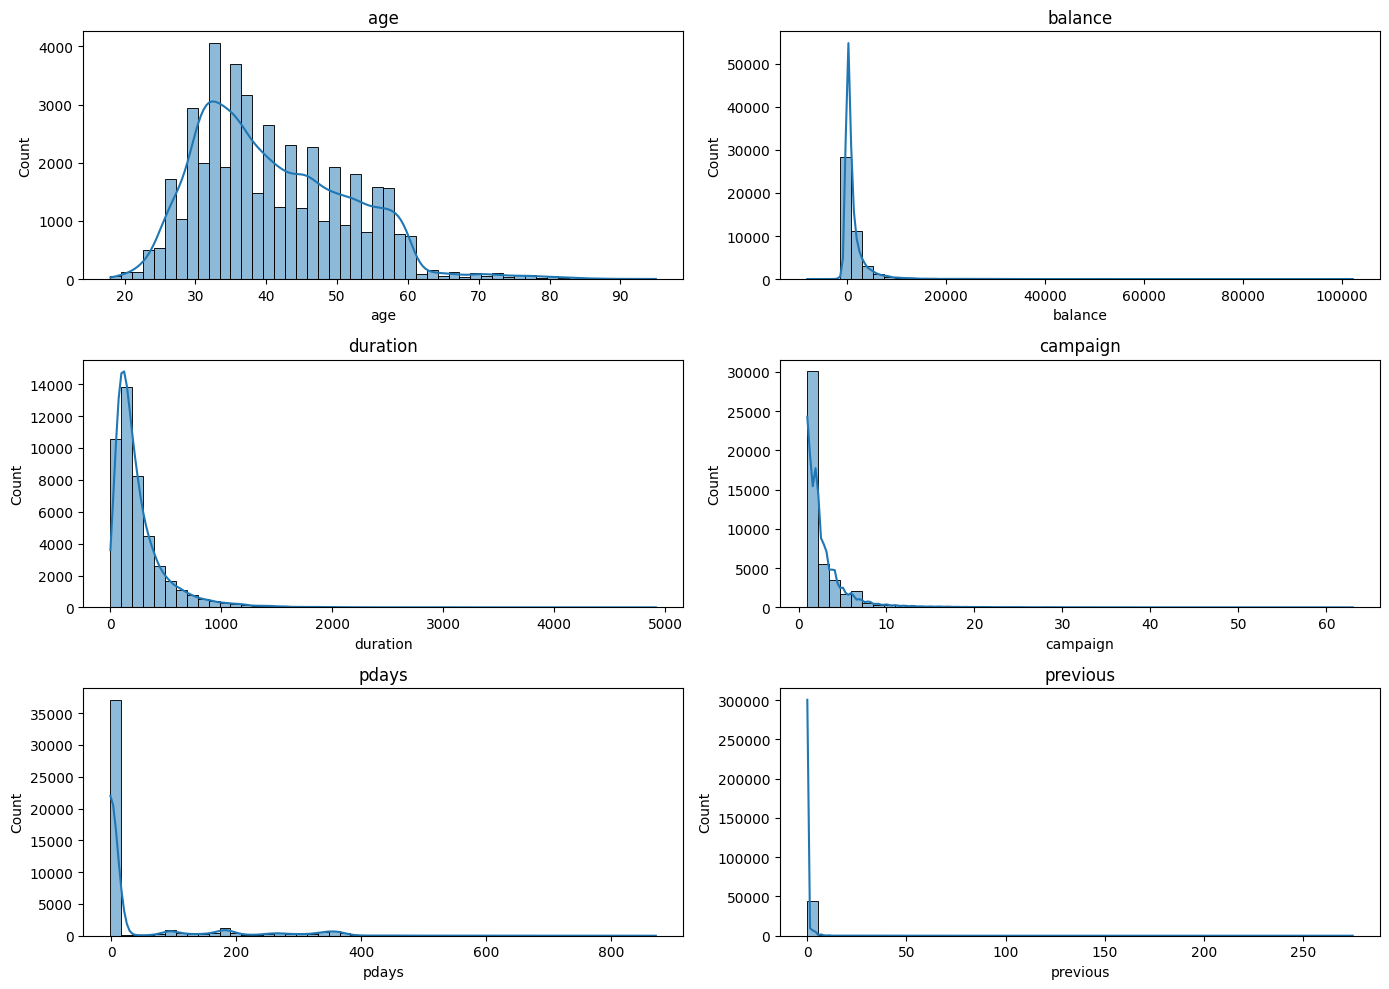

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age','balance','duration','campaign','pdays','previous']

plt.figure(figsize=(14,10))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()

plt.show()


In [11]:
skew_cols = ['balance', 'duration', 'campaign', 'previous']

for col in skew_cols:
    df[col] = np.log1p(df[col])


C:\Users\b6nda\miniconda3\envs\tf\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\b6nda\miniconda3\envs\tf\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


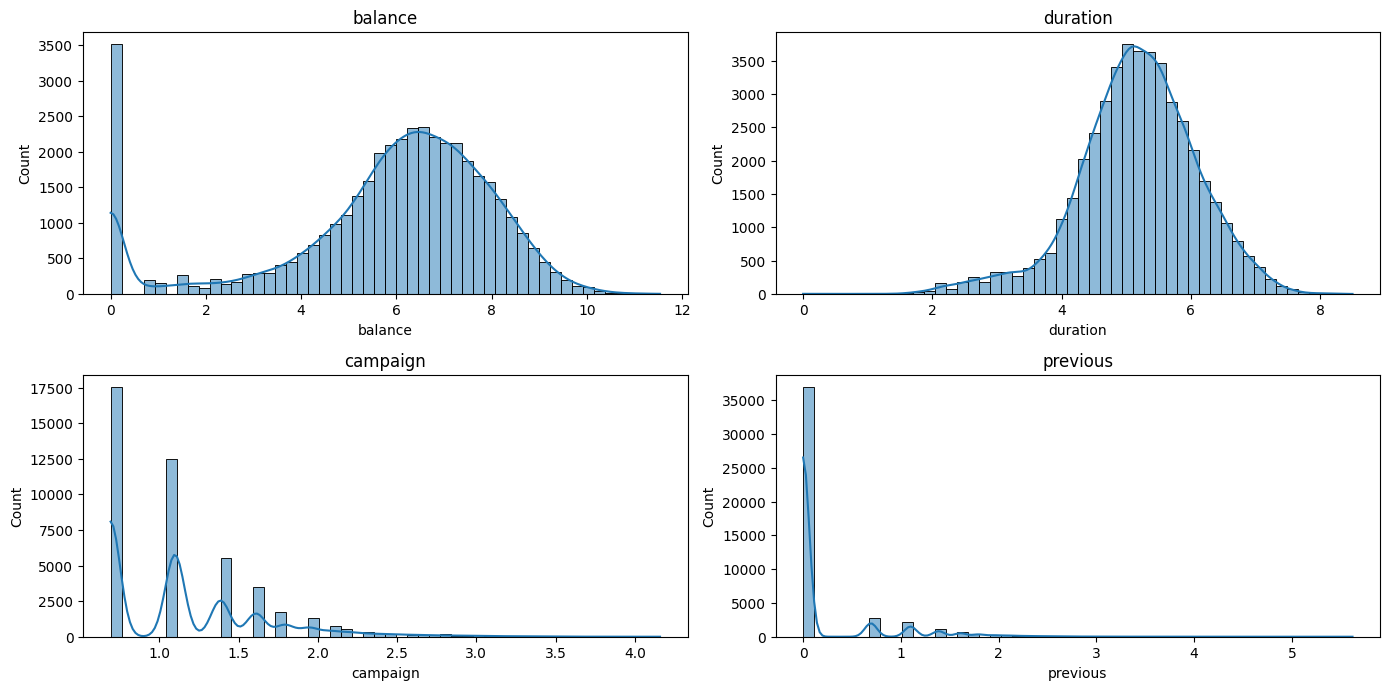

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['balance','duration','campaign','previous']

plt.figure(figsize=(14,10))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()

plt.show()


In [13]:
df['balance'] = df['balance'].replace([np.inf, -np.inf], np.nan)


In [14]:
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include=['int64','float64']).columns

imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])


In [15]:
np.isinf(df[num_cols]).sum()


age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [16]:
np.isinf(df['balance']).sum(), df['balance'].isna().sum()


(0, 0)

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [19]:
def outlier_count(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

for col in ['age','balance','duration','campaign','pdays','previous']:
    print(col, ":", outlier_count(df[col]))


age : 487
balance : 4383
duration : 1238
campaign : 1196
pdays : 8257
previous : 8257


# 6️⃣ Categorical feature distribution

In [20]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print('\n')
    print(df[col].value_counts())




job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


default
no     44396
yes      815
Name: count, dtype: int64


housing
yes    25130
no     20081
Name: count, dtype: int64


loan
no     37967
yes     7244
Name: count, dtype: int64


contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


poutcome
unknown    36959
failur

In [23]:
df_encoded.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

In [24]:
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

lr.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_pred = lr.predict(X_test)


In [29]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[6567, 1418],
       [ 166,  892]], dtype=int64)

In [30]:
acc = accuracy_score(y_test, y_pred)
acc


0.8248368904124738

In [31]:
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)

prec, rec


(0.38614718614718613, 0.8431001890359168)

In [32]:
y_prob = lr.predict_proba(X_test)[:, 1]


In [33]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

thresholds = [0.2, 0.4, 0.6, 0.8]

for t in thresholds:
    y_t = (y_prob >= t).astype(int)
    p = precision_score(y_test, y_t)
    r = recall_score(y_test, y_t)
    print(f"Threshold {t}: Precision={p:.3f}, Recall={r:.3f}")


Threshold 0.2: Precision=0.244, Recall=0.969
Threshold 0.4: Precision=0.336, Recall=0.897
Threshold 0.6: Precision=0.434, Recall=0.770
Threshold 0.8: Precision=0.565, Recall=0.573
